In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
import pickle


In [2]:
df = pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


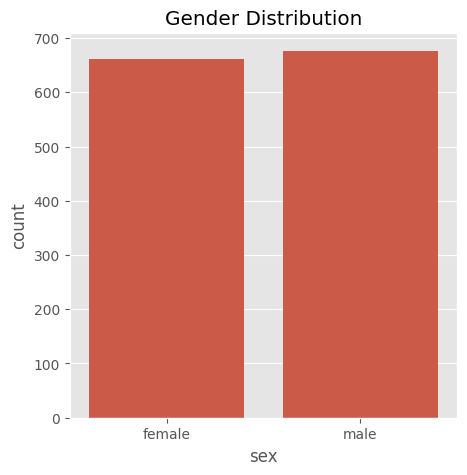

In [8]:
plt.figure(figsize=(5,5))
style.use('ggplot')
sns.countplot(x='sex', data=df)
plt.title('Gender Distribution')
plt.show()

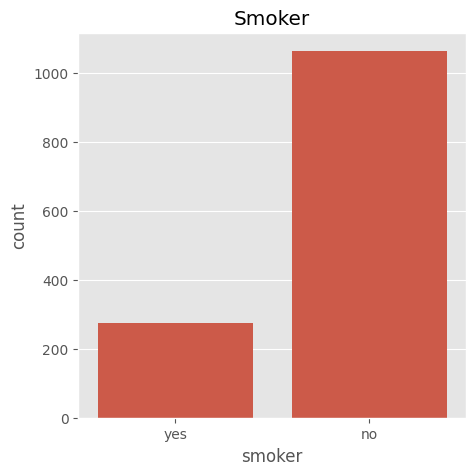

In [9]:
plt.figure(figsize=(5,5))
sns.countplot(x='smoker', data=df)
plt.title('Smoker')
plt.show()

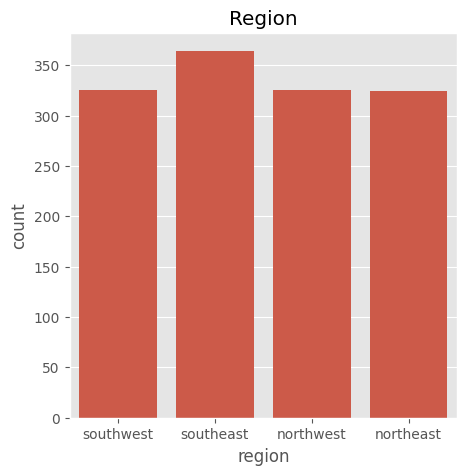

In [10]:
plt.figure(figsize=(5,5))
sns.countplot(x='region', data=df)
plt.title('Region')
plt.show()

Text(0.5, 1.0, 'Charges for smokers')

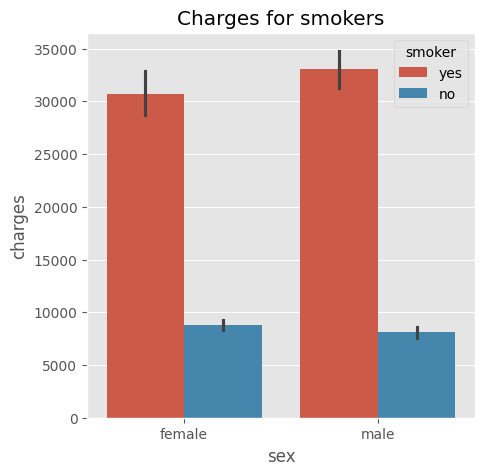

In [11]:
plt.figure(figsize=(5,5))
sns.barplot(x='sex', y='charges',hue='smoker', data=df)
plt.title('Charges for smokers')

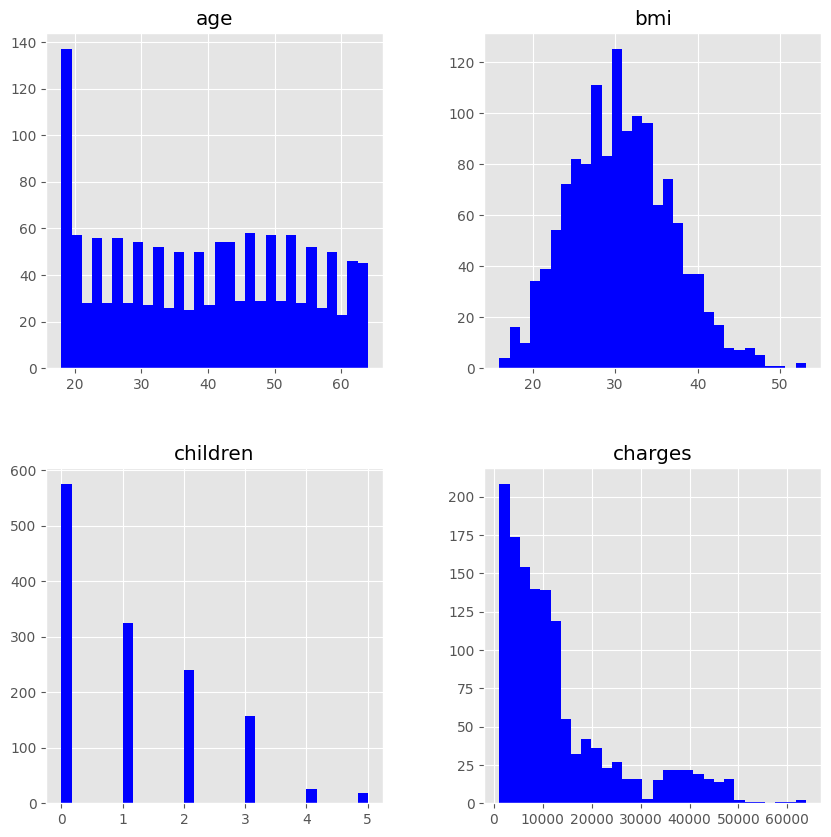

In [12]:
df[['age','bmi','children','charges','sex','smoker','region']].hist(bins=30, figsize=(10,10), color='blue')
plt.show()

In [13]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [14]:
df['sex'] = df['sex'].apply({'male':0, 'female':1}.get)
df['smoker'] = df['smoker'].apply({'yes':1, 'no':0}.get)
df['region'] = df['region'].apply({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}.get)

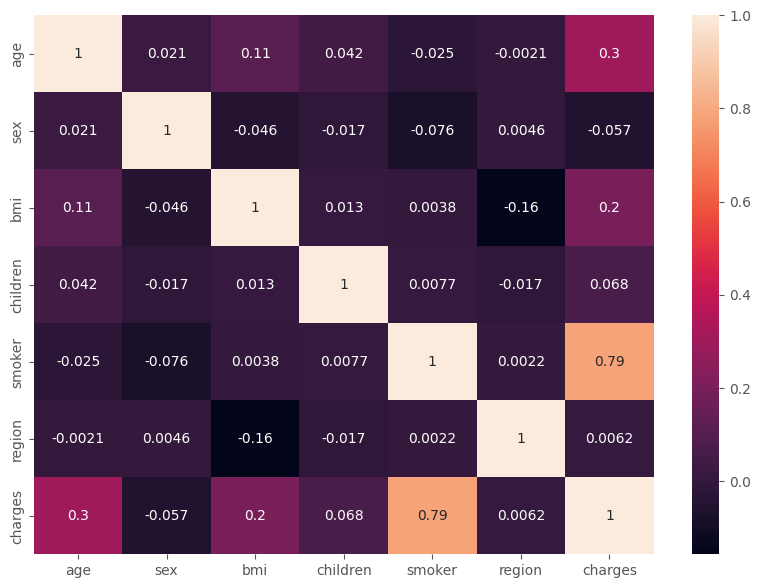

In [15]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.show()

age            AxesSubplot(0.125,0.11;0.0945122x0.77)
sex         AxesSubplot(0.238415,0.11;0.0945122x0.77)
bmi         AxesSubplot(0.351829,0.11;0.0945122x0.77)
children    AxesSubplot(0.465244,0.11;0.0945122x0.77)
smoker      AxesSubplot(0.578659,0.11;0.0945122x0.77)
region      AxesSubplot(0.692073,0.11;0.0945122x0.77)
charges     AxesSubplot(0.805488,0.11;0.0945122x0.77)
dtype: object

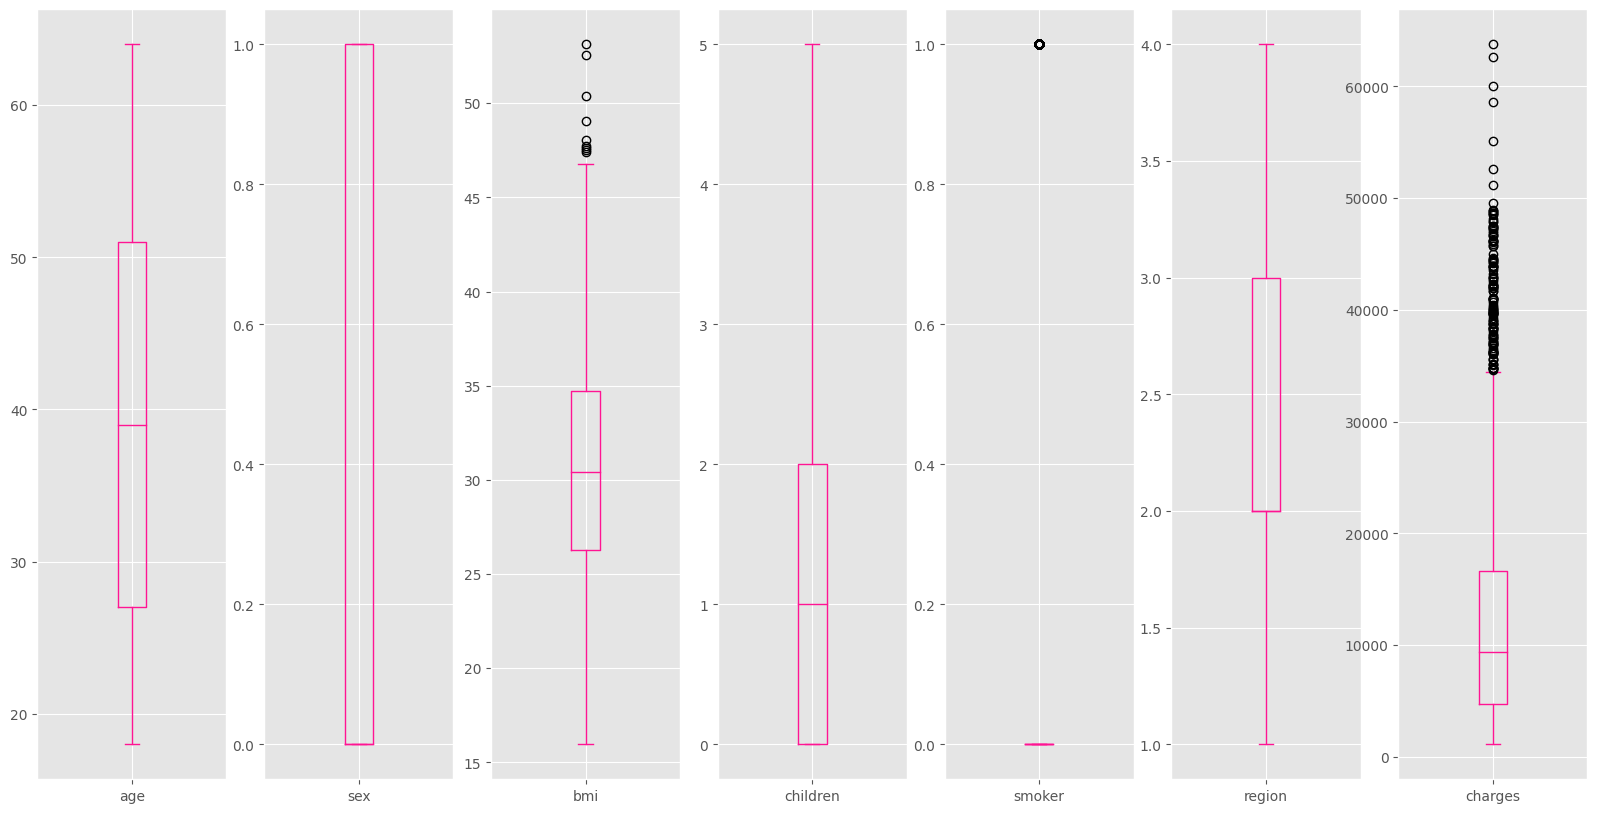

In [16]:
df.plot(kind="box",subplots=True,sharex=False,sharey=False,figsize=(20,10),color='deeppink')

In [17]:
X = df.drop(['charges'], axis=1)
y = df.charges

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print("X_train shape: ", x_train.shape)
print("X_test shape: ", x_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (936, 6)
X_test shape:  (402, 6)
y_train shape:  (936,)
y_test shape:  (402,)


In [19]:
linreg = LinearRegression()

In [20]:
linreg.fit(x_train, y_train)
x_pred=linreg.predict(x_train)
y_pred = linreg.predict(x_test)

In [21]:
print("train score:",linreg.score(x_train,y_train))
print("test score:",linreg.score(x_test,y_test))

train score: 0.74225713201721
test score: 0.7694415927057693


In [22]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ',metrics.mean_squared_error(y_test,y_pred))
print(f"r2 score: {r2_score(y_test,y_pred)}")
print('Adjusted R2 value= ',1 - (1 - (linreg.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,x_pred)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE=  4155.239843059381
MSE=  33805466.89868861
r2 score: 0.7694415927057693
Adjusted R2 value=  0.7663468489836991
RMSE (train)=  6144.199195801808
RMSE (test)=  5814.246890069995


In [23]:
data = {'age':50,'sex':0, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,0,25,2,1,2


In [24]:
cost_pred = linreg.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [33256.77873506]


In [25]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(x_train,y_train)
x_pred=regressor.predict(x_train)
y_pred=regressor.predict(x_test)
print("train score:",regressor.score(x_train,y_train))
print("test score:",regressor.score(x_test,y_test))

train score: 0.9758822358585733
test score: 0.8557073510348296


In [26]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ',metrics.mean_squared_error(y_test,y_pred))
print(f"r2 score: {r2_score(y_test,y_pred)}")
print('Adjusted R2 value= ',1 - (1 - (regressor.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,x_pred)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE=  2504.996952159952
MSE=  21156809.788728192
r2 score: 0.8557073510348296
Adjusted R2 value=  0.8537705369547602
RMSE (train)=  1879.4919961938592
RMSE (test)=  4599.653224834258


In [27]:
data = {'age':50,'sex':0, 'bmi':25, 'children':2, 'smoker':1, 'region':2}
index = [0]
cust_df = pd.DataFrame(data, index)
cust_df

,age,sex,bmi,children,smoker,region
0,50,0,25,2,1,2


In [28]:
cost_pred = regressor.predict(cust_df)
print("The medical insurance cost of the new customer is: ", cost_pred[0])

The medical insurance cost of the new customer is:  23956.338836499992


In [29]:
# Fitting Decision Tree Regression to the dataset
regressordt = DecisionTreeRegressor()
regressordt.fit(x_train,y_train)
x_pred=regressordt.predict(x_train)
y_pred=regressordt.predict(x_test)
print("train score:",regressordt.score(x_train,y_train))
print("test score:",regressordt.score(x_test,y_test))

train score: 1.0
test score: 0.7442137311748749


In [30]:
print('MAE= ',metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ',metrics.mean_squared_error(y_test,y_pred))
print(f"r2 score: {r2_score(y_test,y_pred)}")
print('Adjusted R2 value= ',1 - (1 - (regressordt.score(x_test,y_test))) * ((756 - 1)/(756-10-1)))
print('RMSE (train)= ',np.sqrt(mean_squared_error(y_train,x_pred)))
print('RMSE (test)= ',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE=  2810.7742700472636
MSE=  37504484.63530485
r2 score: 0.7442137311748749
Adjusted R2 value=  0.7407803584389672
RMSE (train)=  0.0
RMSE (test)=  6124.090514950351


In [31]:
kf=KFold(n_splits=7)
kf

KFold(n_splits=7, random_state=None, shuffle=False)

In [32]:
for train_index,test_index in kf.split(['age','sex','bmi','children','smoker','region','charges']):
    print(train_index,test_index)

[1 2 3 4 5 6] [0]
[0 2 3 4 5 6] [1]
[0 1 3 4 5 6] [2]
[0 1 2 4 5 6] [3]
[0 1 2 3 5 6] [4]
[0 1 2 3 4 6] [5]
[0 1 2 3 4 5] [6]


In [33]:
def get_score(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    return model.score(x_test,y_test)

In [34]:
get_score(LinearRegression(),x_train,x_test,y_train,y_test)

0.7694415927057693

In [35]:
get_score(RandomForestRegressor(n_estimators = 100),x_train,x_test,y_train,y_test)

0.8544599583317727

In [36]:
get_score(DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

0.7135355524517792

In [37]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [38]:
regressor.fit(x_train,y_train)

LinearRegression()

In [39]:
pickle.dump(regressor, open('model.pkl','wb'))

In [40]:
model=pickle.load(open('model.pkl','rb'))